In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#%%capture
#!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip -o /content/dogImages.zip
#!mv /content/dogImages /content/drive/My\ Drive/dog-breeds/dog_images

# Configuration & utilities

Here we define the configuration parameters, dependencies and utility functions needed for the experiment. You may only need to specify the 'experiment_description' value in the first line of code, and the paths identifying the project and the different datasets. 

In [2]:
import numpy as np
from glob import glob
import sys

experiment_description = 'resnet_optimizers_50'
project_path = '/content/drive/My Drive/dog-breeds/'

##################### DO NOT MODIFY ################################

experiment_location = project_path + experiment_description
escaped_exp_location = experiment_location.replace(" ", "\\ ")
!mkdir $escaped_exp_location
model_file = experiment_location + '/model_ ' + experiment_description
output_file = experiment_location + '/' + experiment_description
sys.path.append(project_path)
##################### END: DO NOT MODIFY ###########################

dog_files = np.array(glob(project_path + "dog_images/*/*/*"))
print('There are %d total dog images.' % len(dog_files))
train_path = project_path + 'dog_images/train'
validation_path = project_path +'dog_images/valid'
test_path = project_path +'dog_images/test'


def print_gpu():
  gpu_info = !nvidia-smi
  gpu_info = '\n'.join(gpu_info)
  if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
  else:
    print(gpu_info) 

There are 8351 total dog images.


# Experiment

A lot of things here need to be separated:

 - Creation of dataset loaders
 - NN architecture
 - Hyperparameter dictionaries
 - Testing and Rebooting functions
 - Experiment loop
 - Visualization

Thu Apr 23 19:39:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

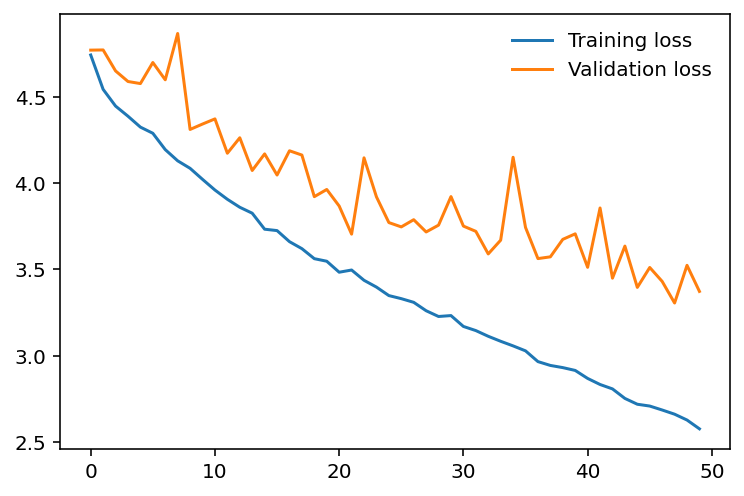

Test Loss: 3.177094

Test Accuracy: 22% (192/836)


running experiment with hyperparameters:
augmentations: [Resize(name=UnnamedResize, parameters=[DiscreteUniform(Deterministic(int 224), Deterministic(int 224)), Deterministic(cubic)], deterministic=False), CropAndPad(name=UnnamedCrop, parameters=[Uniform(Deterministic(int 0), Deterministic(float -0.45000000)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False)]
model: ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2_x): Sequential(
    (0): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=Tr

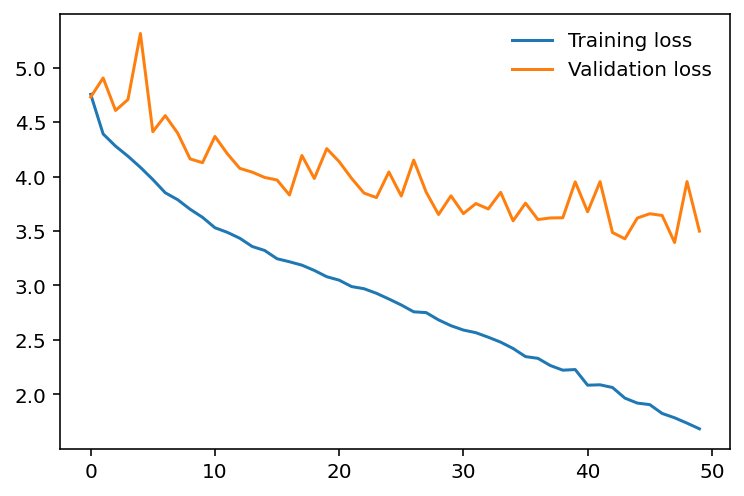

Test Loss: 3.201076

Test Accuracy: 27% (231/836)


running experiment with hyperparameters:
augmentations: [Resize(name=UnnamedResize, parameters=[DiscreteUniform(Deterministic(int 224), Deterministic(int 224)), Deterministic(cubic)], deterministic=False), CropAndPad(name=UnnamedCrop, parameters=[Uniform(Deterministic(int 0), Deterministic(float -0.45000000)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False)]
model: ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2_x): Sequential(
    (0): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=Tr

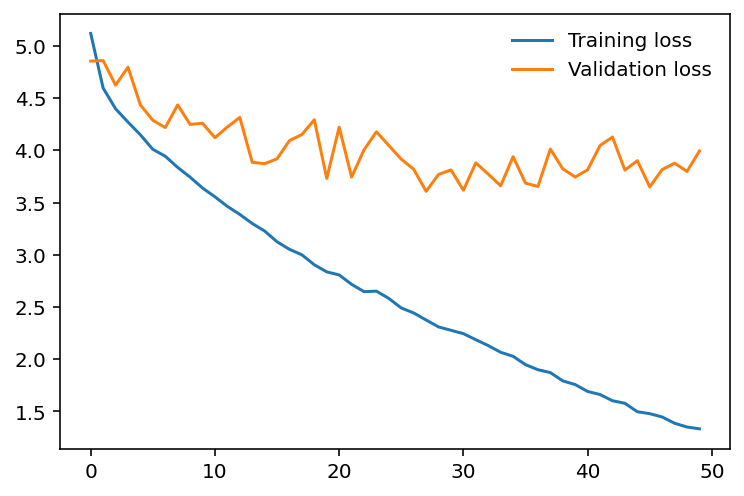

Test Loss: 3.440528

Test Accuracy: 22% (190/836)


running experiment with hyperparameters:
augmentations: [Resize(name=UnnamedResize, parameters=[DiscreteUniform(Deterministic(int 224), Deterministic(int 224)), Deterministic(cubic)], deterministic=False), CropAndPad(name=UnnamedCrop, parameters=[Uniform(Deterministic(int 0), Deterministic(float -0.45000000)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False)]
model: ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2_x): Sequential(
    (0): BasicBlock(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=Tr

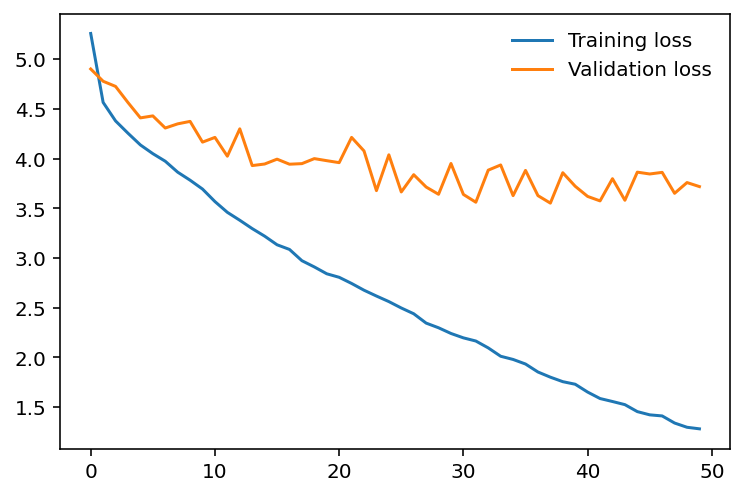

Test Loss: 3.375386

Test Accuracy: 27% (234/836)




In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from utils.preprocess import *
from utils.resnet_model import *
from utils.train import *
from utils.simple_model import *
import torch.optim as optim
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

augmentations = [
                 [iaa.Resize((224, 224)), iaa.Crop(percent=(0, 0.45))]
                ]
learning_rates = [
                 0.001,
                 0.0015,
                 0.002,
                 0.0025
                 ]
optimizers = [
             optim.Adam
             ]
models = [
         resnet18()
         ]
         
paths = {
    'train_path' : train_path,
    'validation_path' : validation_path,
    'test_path' : test_path
}


hyperparameters_dictionary = {
    'augmentations' : augmentations,
    'learning_rates' : learning_rates,
    'epochs' : 50,
    'optimizers' : optimizers,
    'models' : models
}

print_gpu()
run_experiments(paths, hyperparameters_dictionary, model_file)


